In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car_evaluation.csv', names=column_names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.shape

(1728, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.size

12096

In [6]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Length: 1728, dtype: bool

In [9]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [10]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [11]:
df['doors'] = df['doors'].str.replace(r'\s*more', '', regex=True)
df['doors'].unique()

array(['2', '3', '4', '5'], dtype=object)

In [13]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [14]:
df['persons'] = df['persons'].str.replace('more','5').astype('int')

In [15]:
df['persons'].unique()

array([2, 4, 5])

In [16]:
col=['buying','maint','lug_boot','safety','class']
encoder=LabelEncoder()
for i in col:
    df[i]=encoder.fit_transform(df[i])

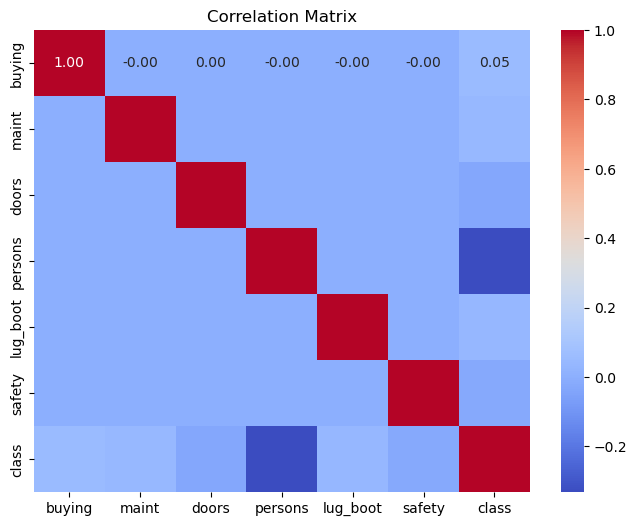

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

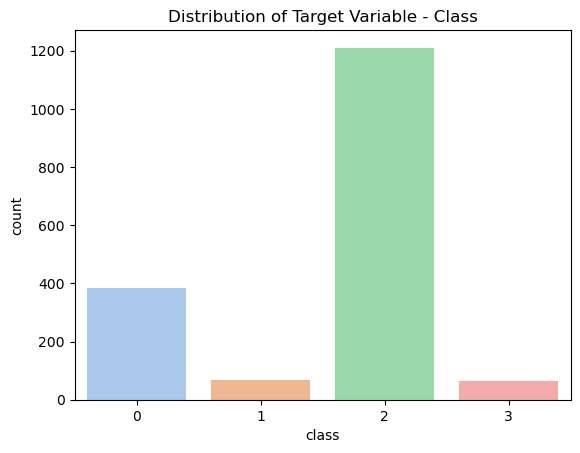

In [18]:
sns.countplot(x='class', data=df, palette="pastel")
plt.title("Distribution of Target Variable - Class")
plt.show()

In [22]:
x = df.drop('class', axis=1)
y = df['class']

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [25]:
x.shape, y.shape

((4840, 6), (4840,))

In [26]:
y.value_counts()

class
2    1210
0    1210
3    1210
1    1210
Name: count, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       236
           1       1.00      1.00      1.00       227
           2       1.00      0.99      0.99       267
           3       1.00      1.00      1.00       238

    accuracy                           1.00       968
   macro avg       1.00      1.00      1.00       968
weighted avg       1.00      1.00      1.00       968



In [32]:
acc = accuracy_score(y_test, y_pred)
acc*100 

99.69008264462809

Use RandomForestClassifier when you have a classification problem and want a robust model that can handle non-linearity, missing data, and is less prone to overfitting compared to other models like Decision Trees.